question 6) by ordinary least square

--- OLS Results ---
Slope (m): 171.1732732937618
Intercept (b): 1627.3680380250194
Prediction for 2500 sq ft: $429560.55


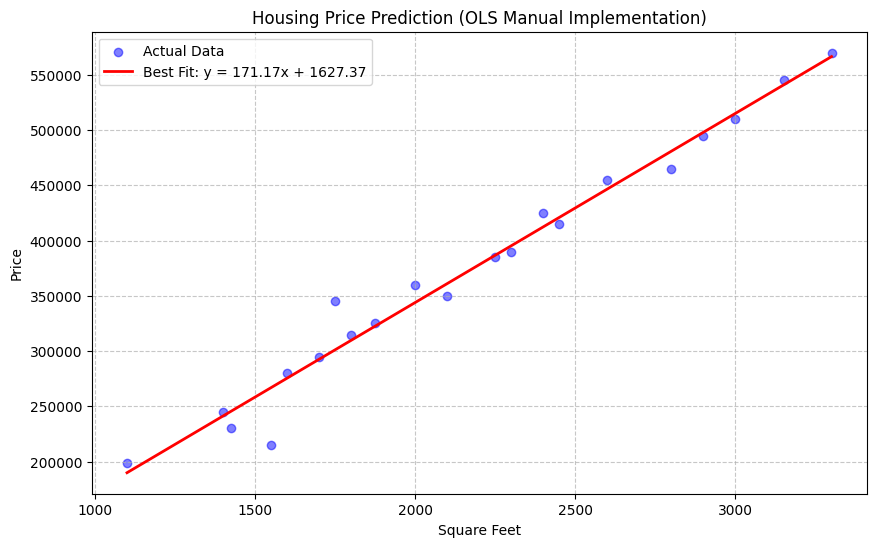

In [12]:
import matplotlib.pyplot as plt
def load_data(filename):
    square_feet = []
    prices = []

    try:
        with open(filename, 'r') as f:
            lines = f.readlines()


            for line in lines[1:]:
                if line.strip():
                    parts = line.strip().split(',')
                    square_feet.append(float(parts[0]))
                    prices.append(float(parts[1]))
    except FileNotFoundError:
        print(f"Error: {filename} not found. Please ensure the file is in the same directory.")
        return [], []

    return square_feet, prices


def calculate_ols_parameters(x_list, y_list):
    n = len(x_list)


    sum_x = sum(x_list)
    sum_y = sum(y_list)
    sum_xy = sum(x * y for x, y in zip(x_list, y_list))
    sum_x2 = sum(x ** 2 for x in x_list)


    numerator = (n * sum_xy) - (sum_x * sum_y)
    denominator = (n * sum_x2) - (sum_x ** 2)
    m = numerator / denominator


    b = (sum_y - (m * sum_x)) / n

    return m, b


filename = '/content/housing_prices - housing_prices.csv'
X, Y = load_data(filename)

if X and Y:

    m, b = calculate_ols_parameters(X, Y)


    target_sq_ft = 2500
    predicted_price = m * target_sq_ft + b

    print(f"--- OLS Results ---")
    print(f"Slope (m): {m}")
    print(f"Intercept (b): {b}")
    print(f"Prediction for {target_sq_ft} sq ft: ${predicted_price:.2f}")


    plt.figure(figsize=(10, 6))


    plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual Data')


    line_x = [min(X), max(X)]
    line_y = [m * xi + b for xi in line_x]

    plt.plot(line_x, line_y, color='red', linewidth=2, label=f'Best Fit: y = {m:.2f}x + {b:.2f}')

    plt.title('Housing Price Prediction (OLS Manual Implementation)')
    plt.xlabel('Square Feet')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

by gradient descent method

Epoch 0: Loss 149696476190
Epoch 1000: Loss 286337795
Epoch 2000: Loss 286337795
Epoch 3000: Loss 286337794
Epoch 4000: Loss 286337793
Epoch 5000: Loss 286337793
Epoch 6000: Loss 286337792
Epoch 7000: Loss 286337792
Epoch 8000: Loss 286337791
Epoch 9000: Loss 286337790
Epoch 10000: Loss 286337790
Epoch 11000: Loss 286337789
Epoch 12000: Loss 286337789
Epoch 13000: Loss 286337788
Epoch 14000: Loss 286337788
Epoch 15000: Loss 286337787
Epoch 16000: Loss 286337786
Epoch 17000: Loss 286337786
Epoch 18000: Loss 286337785
Epoch 19000: Loss 286337785
Epoch 20000: Loss 286337784
Epoch 21000: Loss 286337784
Epoch 22000: Loss 286337783
Epoch 23000: Loss 286337782
Epoch 24000: Loss 286337782
Epoch 25000: Loss 286337781
Epoch 26000: Loss 286337781
Epoch 27000: Loss 286337780
Epoch 28000: Loss 286337779
Epoch 29000: Loss 286337779
Epoch 30000: Loss 286337778
Epoch 31000: Loss 286337778
Epoch 32000: Loss 286337777
Epoch 33000: Loss 286337777
Epoch 34000: Loss 286337776
Epoch 35000: Loss 286337775
Ep

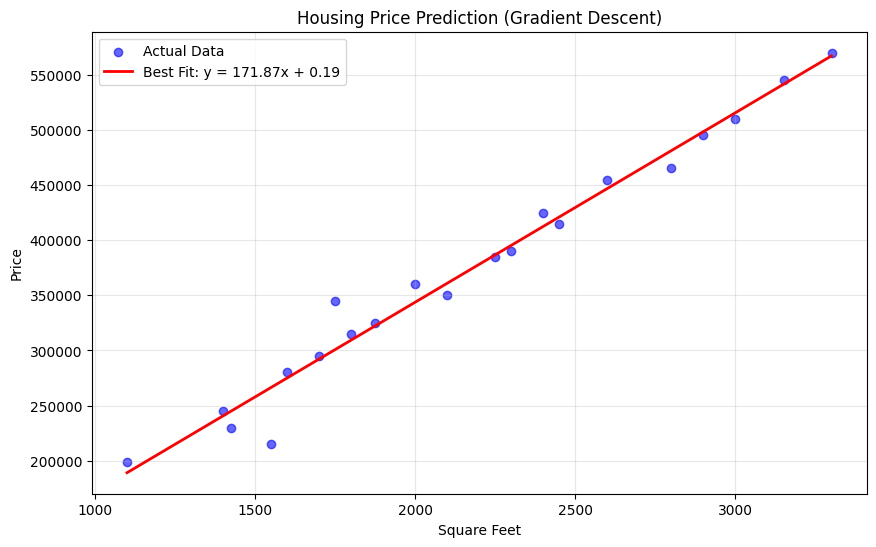

In [13]:
import matplotlib.pyplot as plt


filename = '/content/housing_prices - housing_prices.csv'
X, Y = load_data(filename)

if X and Y:

    m, b, loss = train_gradient_descent(X, Y, learning_rate=1e-8, epochs=50000)


    target_sq_ft = 2500
    predicted_price = m * target_sq_ft + b

    print(f"--- Gradient Descent Results ---")
    print(f"Slope (m): {m}")
    print(f"Intercept (b): {b}")
    print(f"Prediction for {target_sq_ft} sq ft: ${predicted_price:.2f}")


    plt.figure(figsize=(10, 6))


    plt.scatter(X, Y, color='blue', alpha=0.6, label='Actual Data')


    line_y = [m * xi + b for xi in X]

    plt.plot(X, line_y, color='red', linewidth=2, label=f'Best Fit: y = {m:.2f}x + {b:.2f}')


    plt.title('Housing Price Prediction (Gradient Descent)')
    plt.xlabel('Square Feet')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()

question 7

Iter 0, Cost: 0.6819058405477112
Iter 200, Cost: 0.18685608947892282
Iter 400, Cost: 0.12016501025107659
Iter 600, Cost: 0.0905209127073513
Iter 800, Cost: 0.0731665665243076
Iter 1000, Cost: 0.061616726994738136
Iter 1200, Cost: 0.05332334104857942
Iter 1400, Cost: 0.0470573065259005
Iter 1600, Cost: 0.042145718629652565
Iter 1800, Cost: 0.03818672656431325
Iter 2000, Cost: 0.03492453801597227
Iter 2200, Cost: 0.032188143277271854
Iter 2400, Cost: 0.029858662473939635
Iter 2600, Cost: 0.02785077795943116
Iter 2800, Cost: 0.026101610721392943

Survival Probability for Runner (25 km/h, 1 Ammo Clip): 0.9998
Prediction: SURVIVES


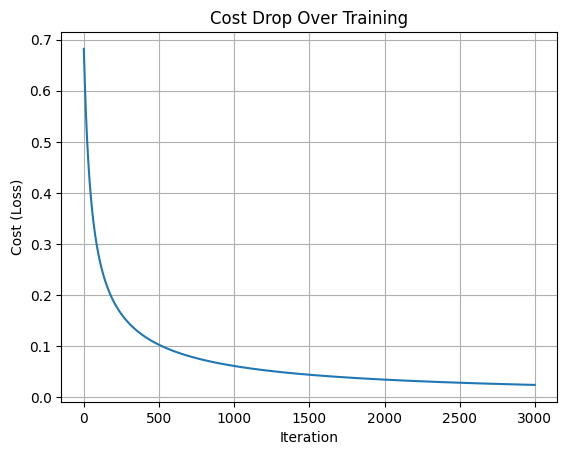

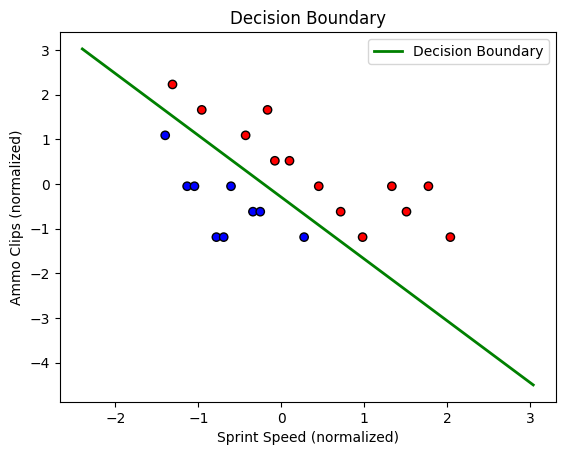

In [28]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def load_csv(filename):
    speeds = []
    ammo = []
    labels = []

    with open(filename, newline='') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            try:
                s = float(row[0])
                a = float(row[1])
                y = int(row[2])

                speeds.append(s)
                ammo.append(a)
                labels.append(y)
            except:
                continue

    X = np.column_stack((speeds, ammo))
    y = np.array(labels).reshape(-1, 1)
    return X, y


def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = len(y)
    z = X @ w + b
    h = sigmoid(z)

    cost = -(1/m) * np.sum(
        y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-10)
    )
    return cost

def gradient_descent(X, y, lr=0.1, iterations=3000):
    m, n = X.shape
    w = np.zeros((n,1))
    b = 0
    cost_history = []

    for i in range(iterations):
        z = X @ w + b
        h = sigmoid(z)

        dw = (1/m) * (X.T @ (h - y))
        db = (1/m) * np.sum(h - y)

        w -= lr * dw
        b -= lr * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 200 == 0:
            print(f"Iter {i}, Cost: {cost}")

    return w, b, cost_history

def predict(speed, ammo, w, b, mean, std):
    x = np.array([speed, ammo])
    x_norm = (x - mean) / std
    prob = sigmoid(np.dot(x_norm, w) + b)
    return prob.item()


def plot_cost(costs):
    plt.plot(costs)
    plt.xlabel("Iteration")
    plt.ylabel("Cost (Loss)")
    plt.title("Cost Drop Over Training")
    plt.grid()
    plt.show()

def plot_decision_boundary(X, y, w, b):
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='bwr', edgecolors='k')

    x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]

    plt.plot(x_vals, y_vals, color='green', linewidth=2, label="Decision Boundary")

    plt.xlabel("Sprint Speed (normalized)")
    plt.ylabel("Ammo Clips (normalized)")
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

def main():
    X_raw, y = load_csv("zombies_data - Sheet1.csv")

    X_norm, mean, std = normalize(X_raw)

    w, b, costs = gradient_descent(X_norm, y, lr=0.1, iterations=3000)

    prob = predict(25, 1, w, b, mean, std)
    print(f"\nSurvival Probability for Runner (25 km/h, 1 Ammo Clip): {prob:.4f}")
    print("Prediction:", "SURVIVES" if prob >= 0.5 else "INFECTED")

    plot_cost(costs)
    plot_decision_boundary(X_norm, y, w, b)


if __name__ == "__main__":
    main()